In [1]:
#!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip

In [2]:
!git clone https://github.com/niazwazir/SRCNN-Keras.git

fatal: destination path 'SRCNN-Keras' already exists and is not an empty directory.


In [3]:
cd SRCNN-Keras/

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE\SRCNN-Keras


In [4]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [5]:
!unzip yang91.zip

unzip:  cannot find or open yang91.zip, yang91.zip.zip or yang91.zip.ZIP.


In [6]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [7]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [8]:
!ls

Image_Super_Resolution.ipynb
MOUNT_SRCNN_37_PSNR.ipynb
PSNR_SSIM_MSE_SRCNN_Super_Resolution_.ipynb
SRCNNMODIFIEDPYTHON2.ipynb
SRCNN_COLOR_IMAGE_GENERATED.ipynb
SRCNN_KERAS.ipynb
SRCNN_KERAS_2nd.ipynb
SRCNN_KERAS_IN_Python3.ipynb
SRCNN_KERAS_IN_Python3_Curves.ipynb
baby_GT.bmp
baby_x2_GT.png
bird_GT.bmp
butterfly_GT.bmp
head_GT.bmp
prepare_data.py
project.gif
subpixel.py
text
woman_GT.bmp
yang91


In [9]:
cd ..

C:\Users\user\Desktop\ELECTRONICS_HANS_PAPER_COMMENTS_RESPONSE


In [10]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SHALLOW_BRANCH.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [11]:
!unzip "DIV2K_train_HR.zip"

unzip:  cannot find or open DIV2K_train_HR.zip, DIV2K_train_HR.zip.zip or DIV2K_train_HR.zip.ZIP.


In [12]:
!rm -r *.zip

rm: cannot remove '*.zip': No such file or directory


In [13]:
!ls

1REVIEWERCOMMENTSRESPONSE.docx
20_BLOCK_MODEL_FOR_IMAGE_SR.ipynb
2REVIEWERCOMMENTSRESPONSE.docx
3REVIEWERCOMMENTSRESPONSE.docx
4REVIEWERCOMMENTSRESPONSE.docx
DEEP_BRANCH.ipynb
HANS1
HANS_PAPER
LINK.txt
PRELU_ACTIVATION_FUNCTION.ipynb
SHALLOW_BRANCH.ipynb
SRCNN-Keras
best_model_improved.h5
electronics-10-02072.pdf
electronics-1466697.docx
model.png
model2_FCN_FSRCNN.h5
~$EVIEWERCOMMENTSRESPONSE.docx
~$ectronics-1466697.docx


In [14]:
DATADIR = "SRCNN-Keras/yang91"
DATADIR2 = "SRCNN-Keras/yang91"
#DATADIR2 = "DIV2K_train_HR"

In [15]:
import os
import cv2
import keras
import numpy as np
import tensorflow as tf
#from google.colab.patches import cv2_imshow
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input,Conv2DTranspose, add, Activation, LeakyReLU

In [16]:
scale = 2
req_size = 20
inp_size = int(req_size/scale)
stride = 15

X=[]
labels=[]

for filera in os.listdir(DATADIR):
    readpath = os.path.join(DATADIR,filera)
    img = cv2.imread(readpath)
    img = np.asarray(img)
    shapes = img.shape
    for i in range(0, shapes[0]-req_size+1, stride):
        for j in range(0, shapes[1]-req_size+1,stride):
            subimage_HR = img[i:i+req_size, j:j+req_size]
            #cv2_imshow(subimage_HR)
            subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
            X.append(subimage_LR)
            labels.append(subimage_HR)

counta=0
for filera in os.listdir(DATADIR2):
    counta=counta+1
    if(counta==300):
        break
        readpath = os.path.join(DATADIR2,filera)
        img = cv2.imread(readpath)
        img = np.asarray(img)
        shapes = img.shape
        for i in range(0, shapes[0]-req_size+1, stride):
            for j in range(0, shapes[1]-req_size+1,stride):
                subimage_HR = img[i:i+req_size, j:j+req_size]
                #cv2_imshow(subimage_HR)
                subimage_LR = cv2.resize(subimage_HR,(inp_size,inp_size))
                X.append(subimage_LR)
                labels.append(subimage_HR)

In [17]:
X = np.asarray(X)
labels = np.asarray(labels)
print(labels.shape)
print(X.shape)

(18849, 20, 20, 3)
(18849, 10, 10, 3)


In [18]:
alpha = 0.85
def basic_mse(y_true, y_pred):
    pred = tf.image.sobel_edges(y_pred)
    true = tf.image.sobel_edges(y_true)
    lossmse = tf.reduce_mean(tf.square(y_pred-y_true))
    lossedge = tf.reduce_mean(tf.square(pred-true))
    return alpha*lossmse + (1-alpha)*lossedge

In [19]:
from tensorflow.keras.layers import Input, Conv2D, Activation, SeparableConv2D
from tensorflow.keras.layers import PReLU

In [20]:
from keras.layers.advanced_activations import PReLU
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D

In [21]:
inputlayer = Input(shape=(None, None, 3))
#BRANCH-1----------->SHALLOW BRANCH
C11 = SeparableConv2D(3,(3,3),padding='SAME')(inputlayer)
PR11 = PReLU(shared_axes=[1,2])(C11)
C12 = SeparableConv2D(3,(1,1),padding='SAME')(PR11)
PR12 = PReLU(shared_axes=[1,2])(C12)
UP11 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(PR12)
C13 = SeparableConv2D(3,(1,1),padding='SAME')(UP11)
PR13 = PReLU(shared_axes=[1,2])(C13)

#BRANCH-2
C21 = SeparableConv2D(3,(3,3),padding='SAME')(inputlayer)
PR21 = PReLU(shared_axes=[1,2])(C21)
C22 = SeparableConv2D(3,(1,1),padding='SAME')(PR21)
PR22 = PReLU(shared_axes=[1,2])(C22)

########BRANCH2-FIRSt BLOCK
AP3=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR22)
AP4=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR22)
AP5=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR22)
ConcatDeep1  = tf.keras.layers.concatenate([AP3,AP4,AP5],axis=-1)
UB_POOL1 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep1)
C_B222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL1)
Sum1  = tf.keras.layers.add([C_B222,PR22])
PR_B222 = PReLU(shared_axes=[1,2])(Sum1)


########BRANCH2-SECOND BLOCK
AP32=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
AP42=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
AP52=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
ConcatDeep2  = tf.keras.layers.concatenate([AP32,AP42,AP52],axis=-1)
UB_POOL2 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep2)
C_B2222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL2)
Sum2  = tf.keras.layers.add([C_B2222,PR22])
PR_B2222 = PReLU(shared_axes=[1,2])(Sum2)

########BRANCH2-THIRD BLOCK
AP33=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
AP43=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
AP53=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
ConcatDeep3  = tf.keras.layers.concatenate([AP33,AP43,AP53],axis=-1)
UB_POOL3 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep3)
C_B22222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL3)
Sum3  = tf.keras.layers.add([C_B22222,PR22])
PR_B22222 = PReLU(shared_axes=[1,2])(Sum3)
########BRANCH2-FOURTH BLOCK
AP34=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
AP44=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
AP54=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
ConcatDeep4  = tf.keras.layers.concatenate([AP34,AP44,AP54],axis=-1)
UB_POOL4 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep4)
C_B222222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL4)
Sum4  = tf.keras.layers.add([C_B222222,PR22])
PR_B222222 = PReLU(shared_axes=[1,2])(Sum4)



UP21 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(PR_B222222)
C23 = SeparableConv2D(3,(1,1),padding='SAME')(UP21)
PR23 = PReLU(shared_axes=[1,2])(C23)


#BRANCH-3
########BRANCH2-SECOND BLOCK
AP32=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
AP42=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
AP52=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B222)
ConcatDeep2  = tf.keras.layers.concatenate([AP32,AP42,AP52],axis=-1)
UB_POOL2 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep2)
C_B2222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL2)
Sum2  = tf.keras.layers.add([C_B2222,PR22])
PR_B2222 = PReLU(shared_axes=[1,2])(Sum2)

########BRANCH2-THIRD BLOCK
AP33=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
AP43=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
AP53=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B2222)
ConcatDeep3  = tf.keras.layers.concatenate([AP33,AP43,AP53],axis=-1)
UB_POOL3 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep3)
C_B22222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL3)
Sum3  = tf.keras.layers.add([C_B22222,PR22])
PR_B22222 = PReLU(shared_axes=[1,2])(Sum3)
########BRANCH2-FOURTH BLOCK
AP34=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
AP44=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
AP54=MaxPooling2D(pool_size=(2,2), strides=(2,2))(PR_B22222)
ConcatDeep4  = tf.keras.layers.concatenate([AP34,AP44,AP54],axis=-1)
UB_POOL4 = Conv2DTranspose(3,(9,9), strides = (2,2), padding="same",activation=None)(ConcatDeep4)
C_B222222 = SeparableConv2D(3,(1,1),padding='SAME')(UB_POOL4)
Sum4  = tf.keras.layers.add([C_B222222,PR22])
PR_B222222 = PReLU(shared_axes=[1,2])(Sum4)



UP21 = Conv2DTranspose(3,(9,9), strides = (scale,scale), padding="same",activation=None)(PR_B222222)
C23 = SeparableConv2D(3,(1,1),padding='SAME')(UP21)
PR33 = PReLU(shared_axes=[1,2])(C23)



##########FINAL ALL BRANCHES ARE CONCATENATED##########
ConcatModel  = tf.keras.layers.concatenate([PR13, PR23, PR33],axis=-1)
DCD4 = SeparableConv2D(3,(1,1),padding='SAME')(ConcatModel)
PRDD4 = PReLU(shared_axes=[1,2])(DCD4)
#model = Model(inputs=inputlayer, outputs=PRDD4)
model = Model(inputs=inputlayer , outputs = PRDD4)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 separable_conv2d_3 (SeparableC  (None, None, None,   39         ['input_1[0][0]']                
 onv2D)                         3)                                                                
                                                                                                  
 p_re_lu_3 (PReLU)              (None, None, None,   3           ['separable_conv2d_3[0][0]']     
                                3)                                                            

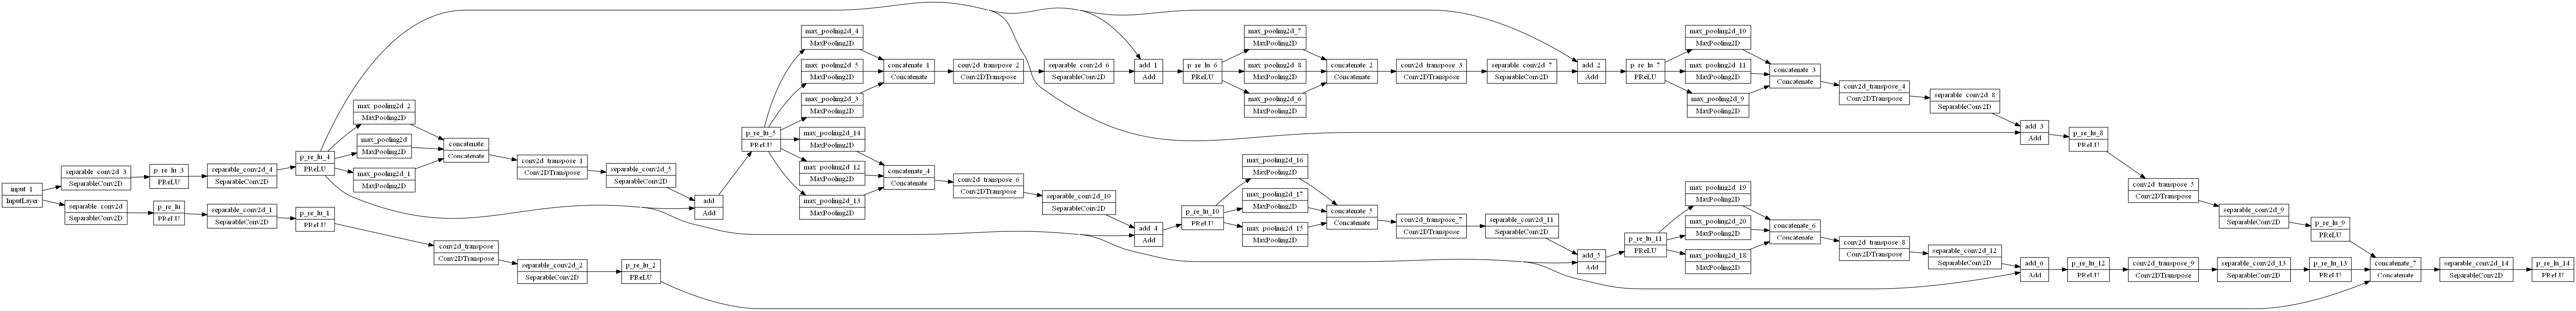

In [23]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [24]:
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

In [25]:
checkpoint = ModelCheckpoint('best_model_improved.h5',  # model filename
                             monitor='val_loss', # quantity to monitor
                             verbose=0, # verbosity - 0 or 1
                             save_best_only= True, # The latest best model will not be overwritten
                             mode='auto') # The decision to overwrite model is made 
                                          # automatically depending on the quantity to monitor

In [26]:
history = model.fit(X,labels,batch_size=32,shuffle=True,validation_split=0.01 ,epochs=5,callbacks=[checkpoint],
                    verbose=1 )

Epoch 1/5
584/584 [==============================] - 20s 26ms/step - loss: 2722.1077 - accuracy: 0.6728 - val_loss: 527.6729 - val_accuracy: 0.9996
Epoch 2/5
  1/584 [..............................] - ETA: 12s - loss: 897.1449 - accuracy: 0.7557

C:\Users\user\anaconda3\envs\cuda_tf\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


584/584 [==============================] - 15s 25ms/step - loss: 476.0128 - accuracy: 0.8397 - val_loss: 126.0373 - val_accuracy: 0.9997
Epoch 3/5
584/584 [==============================] - 14s 23ms/step - loss: 292.6523 - accuracy: 0.8768 - val_loss: 103.9124 - val_accuracy: 0.9997
Epoch 4/5
584/584 [==============================] - 14s 25ms/step - loss: 245.9393 - accuracy: 0.8887 - val_loss: 87.1744 - val_accuracy: 0.9998
Epoch 5/5
584/584 [==============================] - 14s 25ms/step - loss: 211.0118 - accuracy: 0.9009 - val_loss: 76.1524 - val_accuracy: 0.9998


In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Loss Curves')

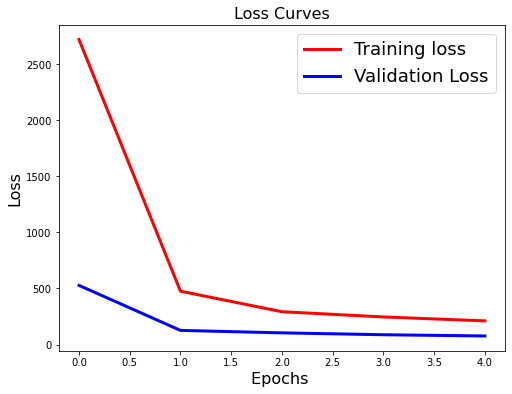

In [28]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

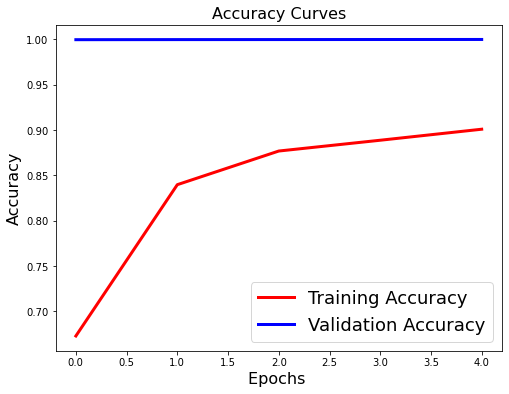

In [29]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [30]:
def psnr_calc():
    testimg = []
    GT = cv2.imread("SRCNN-Keras/baby_x2_GT.png")
    GT = np.asarray(GT)
    h = GT.shape[0]
    l = GT.shape[1]
    img1 = cv2.resize(GT,(int(l/2),int(h/2)),interpolation = cv2.INTER_CUBIC)
    img1 = np.asarray(img1)
    testimg.append(img1)
    testimg = np.asarray(testimg)
    print(testimg.shape)
    fin =(model.predict(testimg)[0])
    inp = cv2.resize(img1,(l,h),interpolation = cv2.INTER_CUBIC)
    GT = GT[0:fin.shape[0],0:fin.shape[1],:]
    mse = np.square(np.subtract(GT, fin)).mean()
    #cv2_imshow(inp)
    #cv2_imshow(fin)
    #cv2_imshow(GT)
    import math
    psnr = 20*math.log(255.0,10) - 10*(math.log(mse,10))
    return psnr

In [31]:
ps1 = psnr_calc()
print(ps1)

(1, 256, 256, 3)
20.794282523877047


In [ ]:
#35.27103087889881

In [ ]:
model.save("model2_FCN_FSRCNN.h5")